Question 1:
In this question we take two disjoint sets and checks the additivity rule . The additivity rule states that number of element in the union of two sets is equal to the sum of elements of the two sets . I have also checked that the input parameter are sets only otherwise it will throw an error.


In [2]:
# Implementation of the counting measure
def counting_measure(set1, set2):
    if not isinstance(set1, set) or not isinstance(set2, set):
        raise TypeError("Both inputs must be sets.")

    if not set1.isdisjoint(set2):
        raise ValueError("The sets are not disjoint.")

    return len(set1) + len(set2)

# Disjoint sets
set1 = {"a", "b", "c"}
set2 = {"d", "e", "f"}

# Check if the sets are disjoint and compute the counting measure
try:
    measure_set1 = len(set1)
    measure_set2 = len(set2)
    measure_union = counting_measure(set1, set2)

    # Check if additivity is satisfied
    additivity_satisfied = measure_set1 + measure_set2 == measure_union

    # Display the results
    print(f"Counting measure of the sets: {measure_union}")
    print(f"Set 1: {set1}")
    print(f"Set 2: {set2}")
    print(f"Are the sets disjoint? {'Yes' if set1.isdisjoint(set2) else 'No'}")
    print(f"Additivity satisfied? {'Yes' if additivity_satisfied else 'No'}")

except TypeError as e:
    print(f"An error occurred: {e}")

except ValueError as e:
    print(f"An error occurred: {e}")


Counting measure of the sets: 6
Set 1: {'c', 'b', 'a'}
Set 2: {'d', 'f', 'e'}
Are the sets disjoint? Yes
Additivity satisfied? Yes


Question 2:
In this question we are taking an interval and returning the length of the interval by substracting the end and the start point . I have checked the input parameter should be interval by using the isInstance function , where it checks if the input is interval or not. If not it will throw an error.


In [19]:
class Interval:
    """A class to represent intervals."""

    def __init__(self, start, end):
        """Initializes an interval.

    Args:
      start: The start point of the interval.
      end: The end point of the interval.
    """
        self.start = start
        self.end = end

    def __str__(self):
        """Returns a string representation of the interval."""
        return f"[{self.start}, {self.end}]"

    def length(self):
        """Returns the length of the interval."""
        return self.end - self.start

def length_measure(interval):
    """Computes the length measure of an interval.

    Args:
      interval: An interval.

    Returns:
      The length measure of the interval.
    """

    if not isinstance(interval, Interval):
        raise TypeError("The input must be an interval.")

    return interval.length()

# Test the length measure on the interval [1, 3.5]
interval = Interval(1, 3.5)
length = length_measure(interval)

print(length)


2.5


Question 3:
In this question I defined a function named "expon_measure", that takes two arguements (interval and lmbda). In this function prob_mass is the cumulative probability for the given interval. I have checked with four other intervals as mentioned in the question. And also I have plotted the intervals against the PDF of Exp(2) and printed the probability measures below.

Probability measure for interval (0, 1): 0.8646647167633873
Probability measure for interval (1, 1): 0.0
Probability measure for interval (1, 10): 0.13533528117545912
Probability measure for interval (0, inf): 1.0


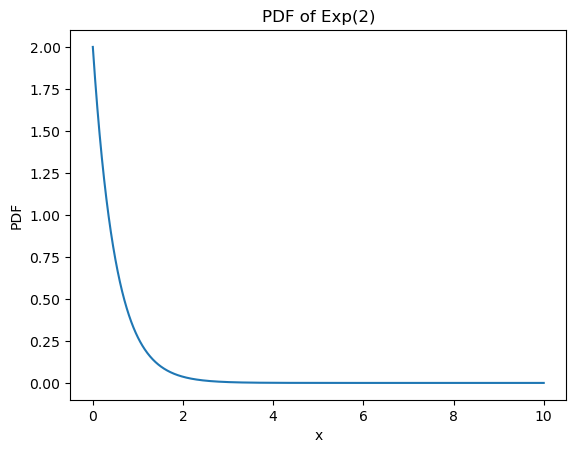

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def expon_measure(interval, lmbda):
    # Create an exponential distribution with the given lambda (lmbda)
    exp_dist = stats.expon(scale=1 / lmbda)

    # Calculate the cumulative probability for the given interval
    prob_mass = exp_dist.cdf(interval[1]) - exp_dist.cdf(interval[0])

    return prob_mass

# Test your function with various intervals
intervals = [(0, 1), (1, 1), (1, 10), (0, np.inf)]

lmbda = 2  # Set the lambda parameter

for interval in intervals:
    prob_mass = expon_measure(interval, lmbda)
    print(f"Probability measure for interval {interval}: {prob_mass}")

# Generate data to plot the PDF of Exp(2)
x = np.linspace(0, 10, 1000)
pdf = stats.expon.pdf(x, scale=1 / lmbda)  # PDF of Exp(2)

# Plot the PDF
plt.plot(x, pdf)
plt.title("PDF of Exp(2)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()

Question 4:
In this question I have defined a function named "expon_pdf". In this function I have created an exponential distribution with lambda = 2. In this given question there are four intervals that I have checked. I have computed and printed the integrals using scipy.integrate.quad below.

Integral from 0 to 1: 0.8646647167633873
Integral from 1 to 1: 0.0
Integral from 1 to 10: 0.1353352811754591
Integral from 0 to inf: 0.9999999999999999


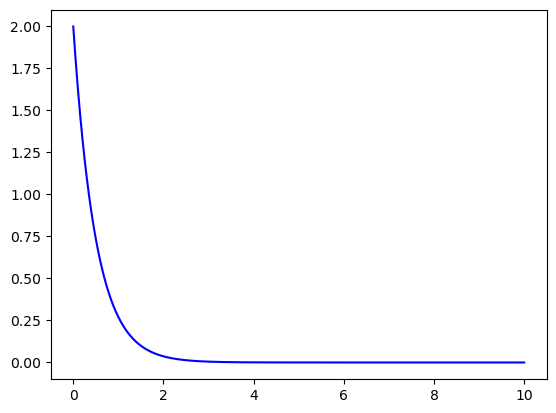

In [8]:
import scipy.stats as stats
from scipy.integrate import quad

# Define the expon_pdf function
def expon_pdf(x):
    # Create an exponential distribution with λ = 2
    exp_dist = stats.expon(scale=1 / 2)
    return exp_dist.pdf(x)

# Define the integrals to calculate
integrals = [
    (0, 1),   # Integral from 0 to 1
    (1, 1),   # Integral from 1 to 1 (a single point)
    (1, 10),  # Integral from 10 to 1 (reverse order)
    (0, float('inf'))  # Integral from 0 to infinity
]

# Compute and print the integrals using scipy.integrate.quad
for a, b in integrals:
    result, _ = quad(expon_pdf, a, b)
    print(f"Integral from {a} to {b}: {result}")


# Create a range of x values for plotting
x = np.linspace(0, 10, 1000)
pdf = expon_pdf(x)

# Plot the PDF
plt.plot(x, pdf, label="PDF of Exp(2)", color='blue')

### Question 4:
#### The integral from 0 to 1 is approximately 0.8646647167633873, which matches the probability measure for the interval [0, 1] in the previous question.
#### The integral from 1 to 1 (a single point) is 0.0, which is expected as it represents the probability measure at a single point, and the PDF is zero at that point for a continuous distribution.
#### The integral from 1 to 10  is approximately 0.1353352811754591
#### The integral from 0 to infinity is approximately 1.0, representing the entire probability space under the exponential distribution, and it matches the result in the previous question.
#### The results are consistent with the properties of probability density functions and integrals of continuous probability distributions.
#### In question 3 we used the CDF method to calculate the probabilty mass for the given interval and in question 4 we are integrating the PDF and getting the CDF for a given interval. This results the same value for the given interval in both the questions.


